<a href="https://colab.research.google.com/github/Bhavani0724/Bhavani0724/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##House Price Prediction Dataset.
The dataset contains 2000 rows of house-related data, representing various features that could influence house prices. Below, we discuss key aspects of the dataset, which include its structure, the choice of features, and potential use cases for analysis.

 I found this dataset in Kaggle.

1.This is a supervised regression problem in machine learning. :

Supervised Learning: The model is trained on labeled data, where each example has input features (e.g., area, number of bedrooms, bathrooms, etc.) and a corresponding target output (house price). The goal is to learn the mapping from input to output.

Regression: The task is to predict a continuous numerical value (the house price) based on the input features, which makes it a regression problem. Unlike classification, where the output is a category or class, regression predicts real-valued outputs.

Characteristics of this ML Problem:
Features: Attributes such as area, bedrooms, bathrooms, floors, year built, location, condition, and garage.
Target: House price (a continuous numeric value).
Goal: Train a model that can predict the house price based on the given features.



We'll use supervised machine learning models to predict the house price. The steps involve:
1.	Data preprocessing: Handle categorical variables, missing values, Label encoding and normalization.
2.	Model selection: We can try several models, such as:
Linear Regression,
Decision Tree Regressor,
Random Forest Regressor.
3.	Model evaluation: Use metrics such as mean squared error (MSE) and R-squared to evaluate model performance.



In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load data
data=pd.read_csv('/content/House_Price_Prediction_Dataset[1].csv')


In [ ]:
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [ ]:
#first five data
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
#tail - last five data
data.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [ ]:
#the main columns
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [ ]:
#the shape of the data
data.shape

(2000, 10)

In [ ]:
#describe
data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [ ]:
#finding null values
data.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
#info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


<Axes: xlabel='Price', ylabel='Count'>

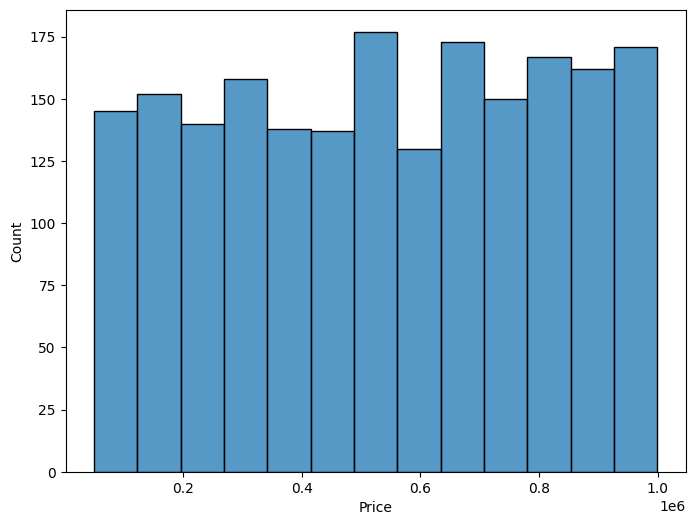

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Pre Processing Techniques
1.Handling Missing values

In [ ]:
#Check for missing values in the dataset
missing_values=data.isnull().sum()

2.Label Encoding

In [ ]:
#Encode Categorical variables:Location,Condition,Garage
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Condition'] = label_encoder.fit_transform(data['Condition'])
data['Garage'] = label_encoder.fit_transform(data['Garage'])

In [ ]:
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,2,3,0,295620
1996,1997,3046,5,2,1,2019,2,3,1,580929
1997,1998,1062,5,1,2,1903,1,3,0,476925
1998,1999,4062,3,1,2,1936,3,0,1,161119


In [ ]:
#correlation
data.corr()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
Id,1.000000,-0.012966,-0.016393,-0.025433,-0.002025,0.008840,-0.013171,0.017908,0.001199,-0.025643
Area,-0.012966,1.000000,0.047523,0.021881,0.017749,-0.011609,-0.003910,0.002030,-0.003441,0.001542
Bedrooms,-0.016393,0.047523,1.000000,-0.011990,0.010435,-0.014125,0.016958,0.006743,-0.041713,-0.003471
Bathrooms,-0.025433,0.021881,-0.011990,1.000000,0.029089,-0.000839,-0.016471,0.020183,0.004057,-0.015737
Floors,-0.002025,0.017749,0.010435,0.029089,1.000000,-0.006474,0.006430,0.021006,-0.004635,0.055890
YearBuilt,0.008840,-0.011609,-0.014125,-0.000839,-0.006474,1.000000,-0.040727,0.025780,-0.011703,0.004845
Location,-0.013171,-0.003910,0.016958,-0.016471,0.006430,-0.040727,1.000000,0.028387,0.019827,-0.012289
Condition,0.017908,0.002030,0.006743,0.020183,0.021006,0.025780,0.028387,1.000000,0.039389,-0.015036
Garage,0.001199,-0.003441,-0.041713,0.004057,-0.004635,-0.011703,0.019827,0.039389,1.000000,0.002842
Price,-0.025643,0.001542,-0.003471,-0.015737,0.055890,0.004845,-0.012289,-0.015036,0.002842,1.000000


In [ ]:
data.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Floors,0.055890
YearBuilt,0.004845
Garage,0.002842
Area,0.001542
Bedrooms,-0.003471
Location,-0.012289
Condition,-0.015036
Bathrooms,-0.015737
Id,-0.025643


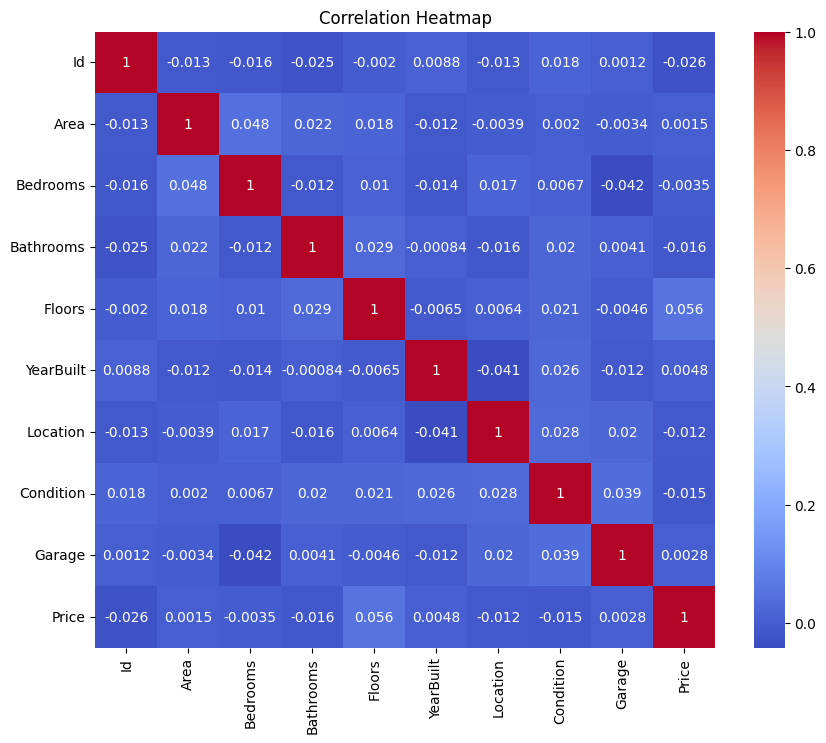

In [ ]:
#heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#3.Feature Scaling

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=['Id', 'Price'])
y = data['Price']

In [ ]:
X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,0,0,0
1,4272,5,4,3,1958,0,0,0
2,3592,2,2,3,1938,0,2,0
3,966,4,2,2,1902,2,1,1
4,4926,1,4,2,1975,0,1,1
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,2,3,0
1996,3046,5,2,1,2019,2,3,1
1997,1062,5,1,2,1903,1,3,0
1998,4062,3,1,2,1936,3,0,1


In [ ]:
y

,Price
0,149919
1,424998
2,266746
3,244020
4,636056
...,...
1995,295620
1996,580929
1997,476925
1998,161119


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature data (normalize the scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Output the shape of the datasets to ensure proper split
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((1600, 8), (400, 8), (1600,), (400,))

The data has been successfully split into training and testing sets:
Training data: 1600 samples with 8 features
Testing data: 400 samples with 8 features


In [ ]:

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report




In [ ]:
#Logistic regression in price prediction
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)

accuracy_lr



0.0

1.linear regression model

In [ ]:
# prompt: perform linear regression in positive r2 value

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test_scaled)

# Calculate R-squared for Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)

print("R-squared for Linear Regression:", r2_linear)

# If R-squared is negative, adjust the model or data
if r2_linear < 0:
  print("R-squared is negative. Consider adjusting the model or data.")
  # You could try different features, handle outliers differently, or use a different model.

R-squared for Linear Regression: -0.011961539273188215
R-squared is negative. Consider adjusting the model or data.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate performance metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lr, r2_lr


(78729422262.6482, -0.011961539273188215)

2.Decision tree regression model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Calculate performance metrics for Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt


(169190327830.495, -1.1747156229636482)

3. Randomforest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate performance metrics for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest MSE: 86258440081.58017
Random Forest R-squared: -0.1087370044333893


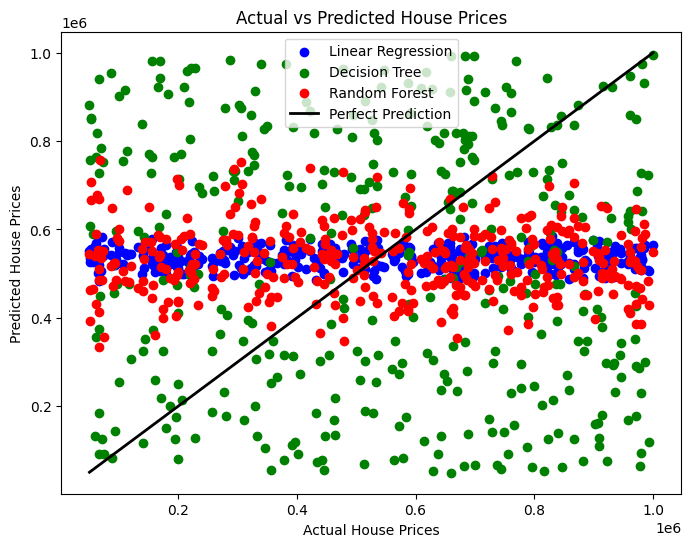

In [ ]:
#visualize chart for actual and predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', lw=2, label='Perfect Prediction')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.legend()
plt.title('Actual vs Predicted House Prices')
plt.show()


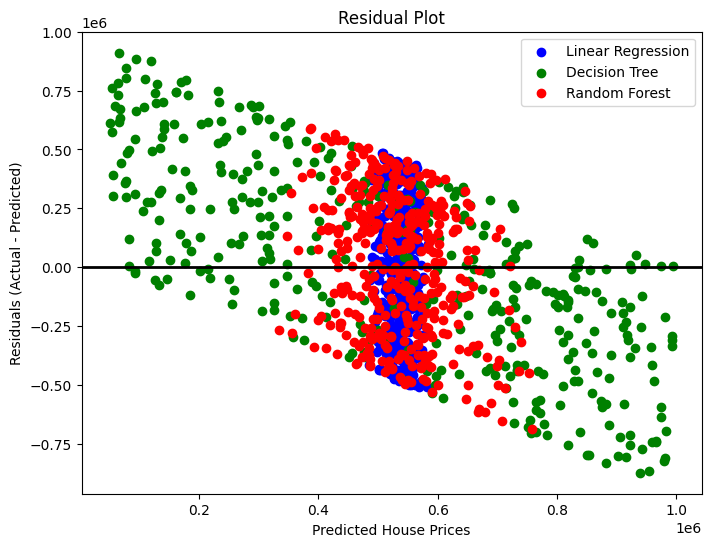

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, y_test - y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_pred_dt, y_test - y_pred_dt, color='green', label='Decision Tree')
plt.scatter(y_pred_rf, y_test - y_pred_rf, color='red', label='Random Forest')
plt.axhline(y=0, color='black', lw=2)
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.title('Residual Plot')
plt.show()


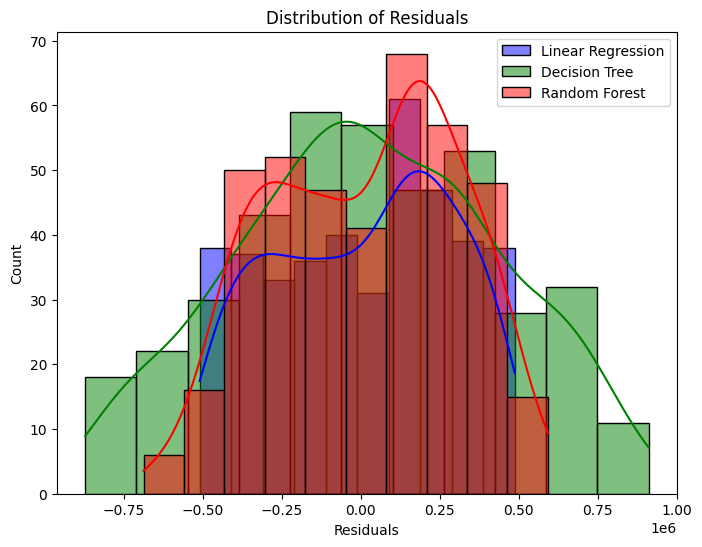

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred_lr, color='blue', label='Linear Regression', kde=True)
sns.histplot(y_test - y_pred_dt, color='green', label='Decision Tree', kde=True)
sns.histplot(y_test - y_pred_rf, color='red', label='Random Forest', kde=True)
plt.xlabel('Residuals')
plt.legend()
plt.title('Distribution of Residuals')
plt.show()


Comparision of two metrics

Let's compare the performance of the models based on the evaluation metrics.
1.	MSE: Lower is better.
2.	R-squared: Higher is better (values closer to 1 indicate a better fit).



In [ ]:


print(f"Linear Regression MSE: {mse_lr}, R-squared: {r2_lr}")
print(f"Decision Tree MSE: {mse_dt}, R-squared: {r2_dt}")
print(f"Random Forest MSE: {mse_rf}, R-squared: {r2_rf}")

if mse_lr < mse_dt and mse_lr < mse_rf and r2_lr > r2_dt and r2_lr > r2_rf:
  print("Linear Regression is the best model.")
elif mse_dt < mse_lr and mse_dt < mse_rf and r2_dt > r2_lr and r2_dt > r2_rf:
  print("Decision Tree is the best model.")
else:
  print("Random Forest is the best model.")


Linear Regression MSE: 78729422262.6482, R-squared: -0.011961539273188215
Decision Tree MSE: 169190327830.495, R-squared: -1.1747156229636482
Random Forest MSE: 86258440081.58017, R-squared: -0.1087370044333893
Linear Regression is the best model.


##conclusion:

compared the three metrics in between the three model, the linear regression model is best.




In [ ]:
data.fillna(data, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         2000 non-null   int64
 1   Area       2000 non-null   int64
 2   Bedrooms   2000 non-null   int64
 3   Bathrooms  2000 non-null   int64
 4   Floors     2000 non-null   int64
 5   YearBuilt  2000 non-null   int64
 6   Location   2000 non-null   int64
 7   Condition  2000 non-null   int64
 8   Garage     2000 non-null   int64
 9   Price      2000 non-null   int64
dtypes: int64(10)
memory usage: 156.4 KB
